In [1]:
%cd /Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data


c:\Users\Nisha Preetha M\DS-Projects\Sentinal-2\pichavaram_data


In [2]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep


import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
S_sentinel_bands = glob("C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data\\20

In [4]:
l=[]
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))


In [5]:
# Data
arr_st = np.stack(l)

In [6]:
from scipy.io import loadmat
import numpy as np
import rasterio as rio

# Load Ground Truth data
y_data = loadmat('C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_gt')['gt']
print(y_data.sum())

# Initialize an empty list to hold the data from each band
l = []

# Loop through each band in S_sentinel_bands
for i in S_sentinel_bands:
    with rio.open(i, 'r') as f:
        l.append(f.read(1))  # Indented correctly

# Stack the arrays to create a 3D array
arr_st = np.stack(l)
arr_st.shape


618796


(12, 954, 298)

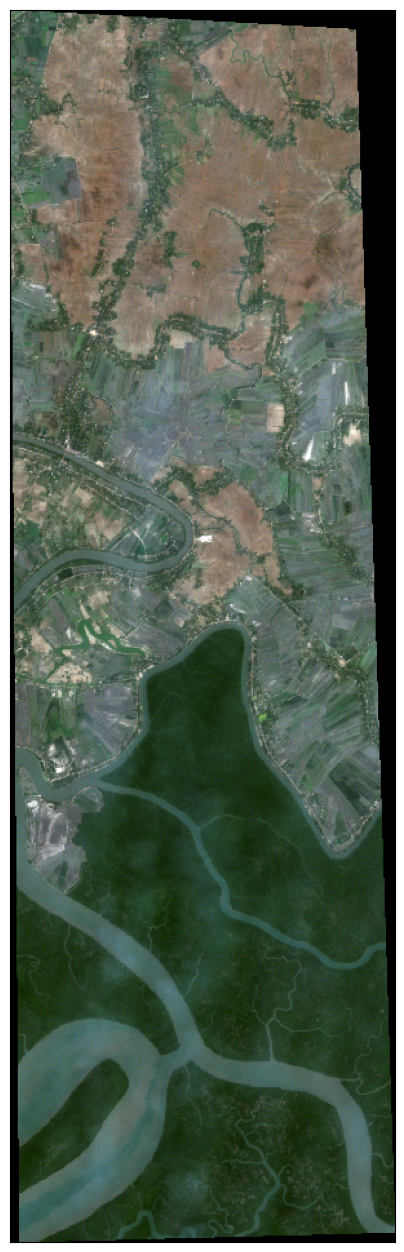

In [7]:
np.seterr(divide='ignore', invalid='ignore')
ep.plot_rgb(
 arr_st,
 rgb=(3, 2, 1),
 stretch=True,
 str_clip=0.02,
 figsize=(12, 16),
 # title=”RGB Composite Image with Stretch Applied”,
)
plt.show()

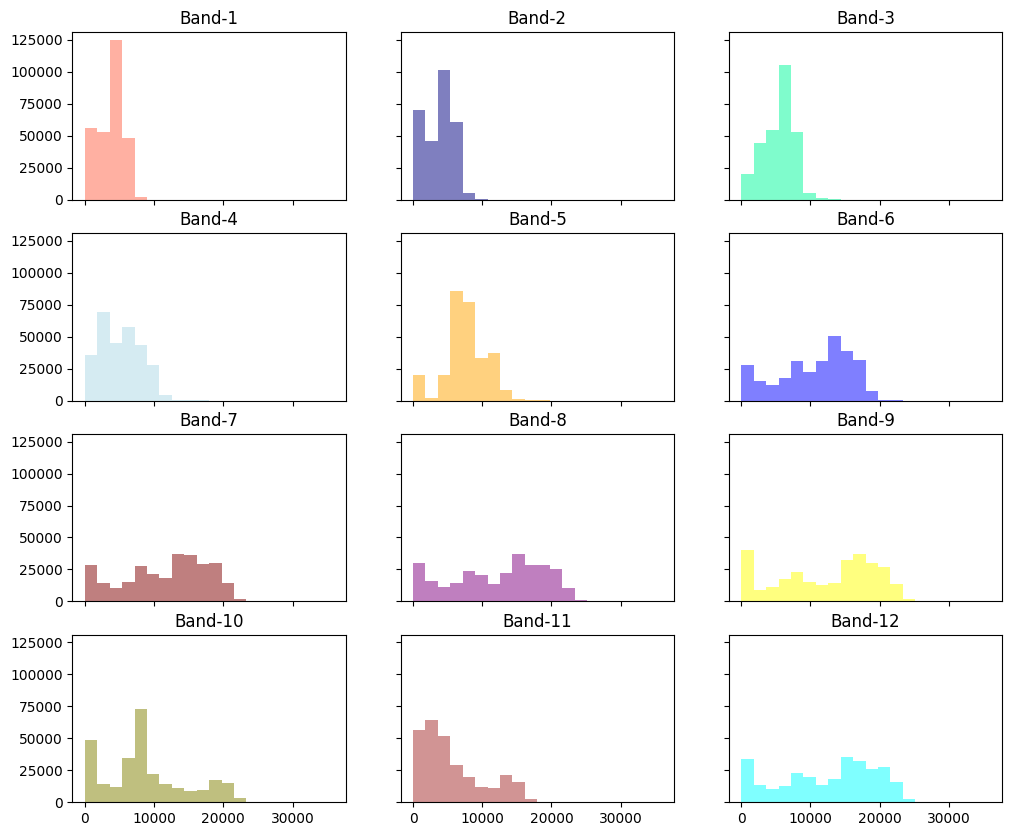

In [8]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
 'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']
ep.hist(arr_st, 
    colors = colors,
    title=[f'Band-{i}' for i in range(1, 13)], 
    cols=3, 
    alpha=0.5, 
    figsize = (12, 10)
 )
plt.show()

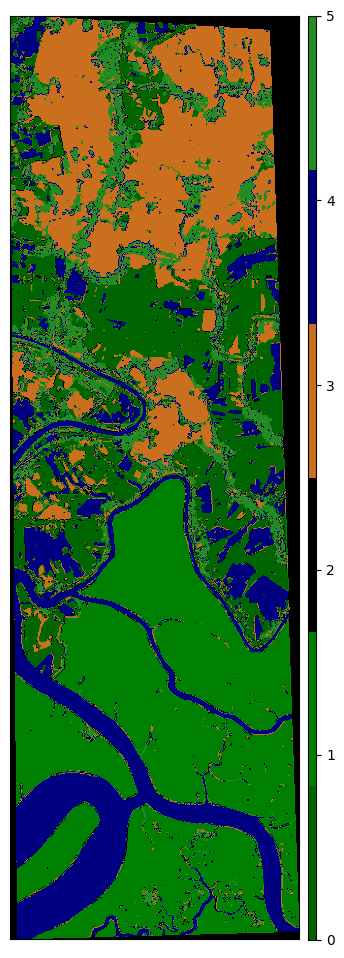

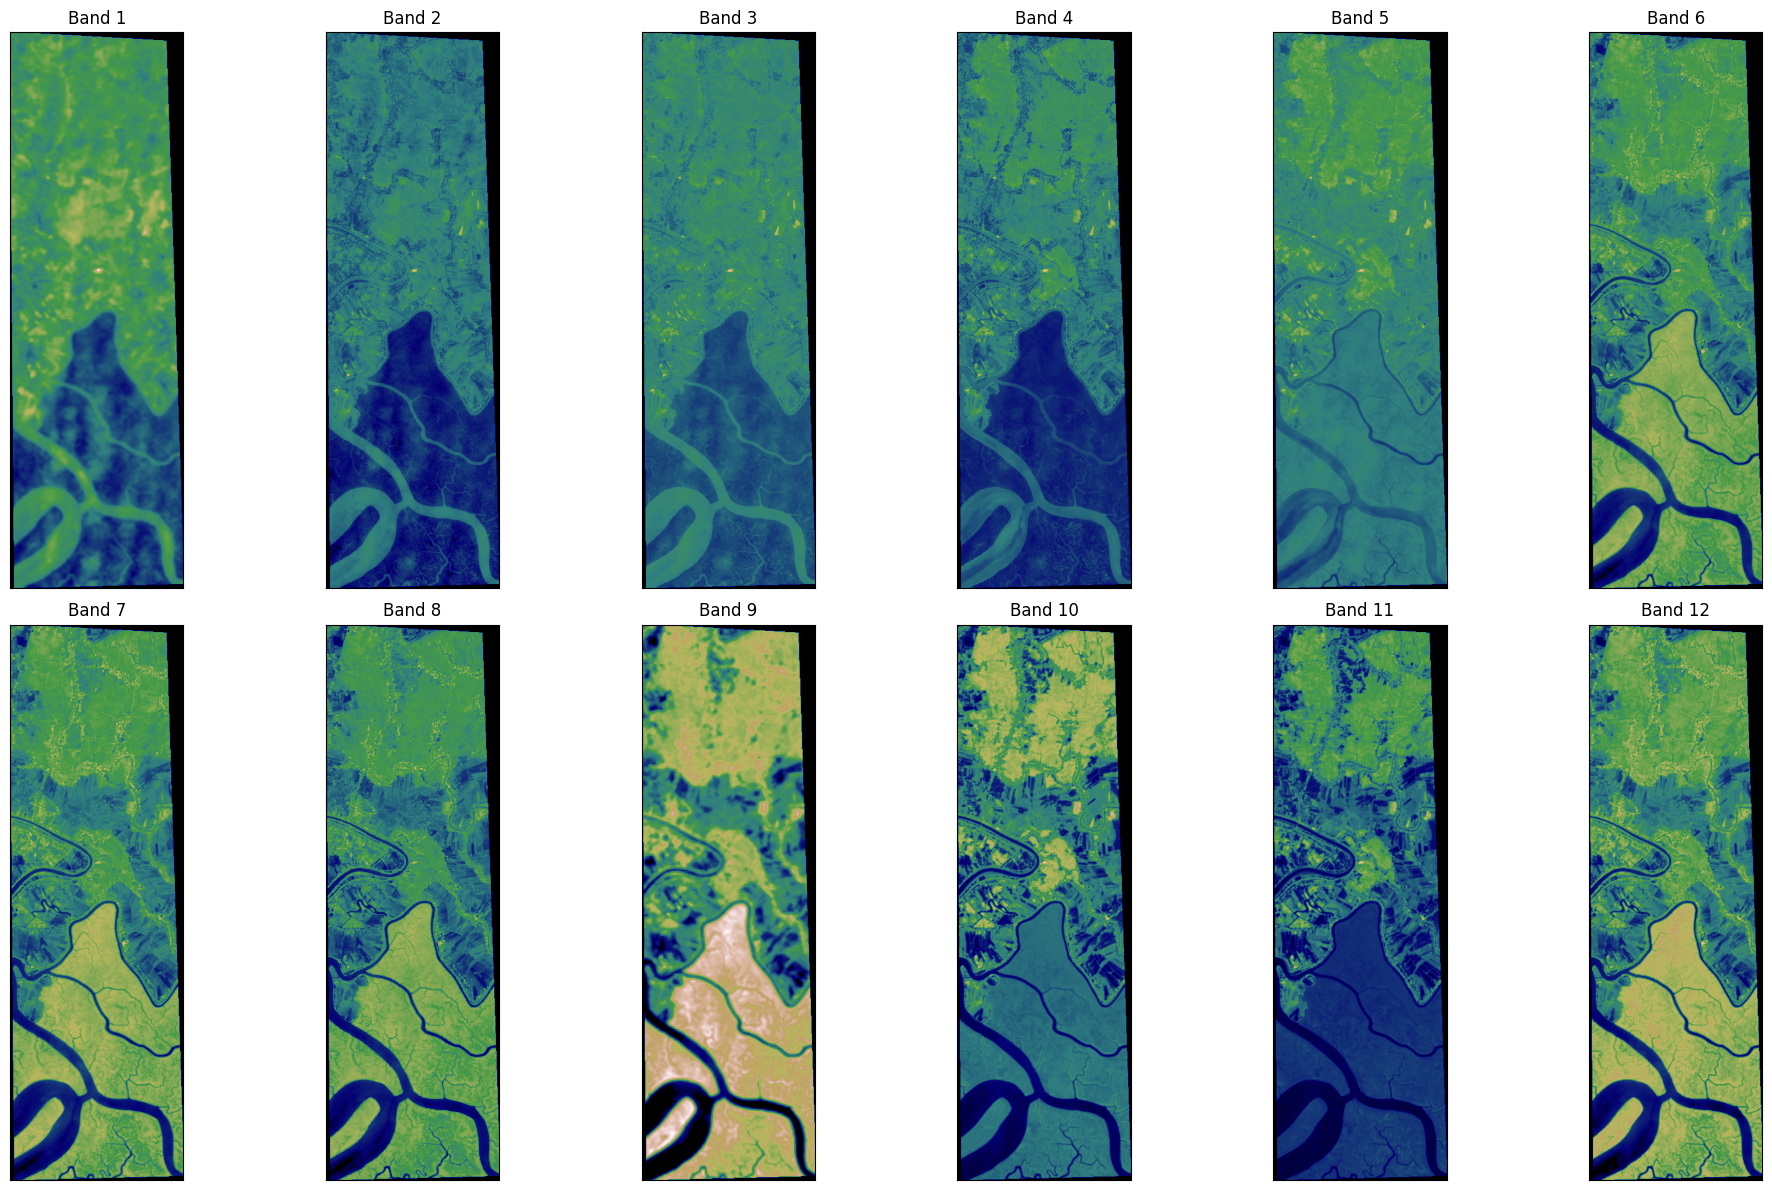

In [9]:
# Visualize Groundtruth
ep.plot_bands(y_data, 
 cmap=ListedColormap(['darkgreen', 'green', 'black', 
 '#CA6F1E', 'navy', 'forestgreen']))
plt.show()
ep.plot_bands(arr_st, 
    cmap = 'gist_earth', 
    figsize = (20, 12), 
    cols = 6, 
    cbar = False
    )
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


x = np.moveaxis(arr_st, 0, -1)
X_data = x.reshape(-1, 12)
scaler = StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
pca = PCA(n_components = 4)
pca.fit(X_scaled)
data = pca.transform(X_scaled)


In [11]:
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Conv3D
from tensorflow.keras.layers import Dense, Activation, Flatten,Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K 
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
from keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
import tensorflow as tf
tf.keras.callbacks.TensorBoard
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [12]:
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

In [13]:
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, 
X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX



In [14]:
def createImageCubes(X, y, windowSize=5, removeZeroLabels = False):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)

In [48]:
import numpy as np

def padWithZeros(X, margin):
    # Padding X with zeros on all sides
    return np.pad(X, ((margin, margin), (margin, margin), (0, 0)), mode='constant', constant_values=0)


In [49]:
def createImageCubes(X, y, windowSize=5, removeZeroLabels=False):
    margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)

    # Now use zeroPaddedX in further computations, like generating cubes
    # For example:
    cubes = []
    for i in range(margin, X.shape[0] - margin):
        for j in range(margin, X.shape[1] - margin):
            cube = zeroPaddedX[i - margin:i + margin + 1, j - margin:j + margin + 1]
            cubes.append(cube)
    
    return np.array(cubes)


In [50]:
import numpy as np

# Assuming this is the padding function used
def padWithZeros(X, margin):
    """Pad the image X with zeros, based on the margin (half window size)"""
    return np.pad(X, ((margin, margin), (margin, margin), (0, 0)), mode='constant', constant_values=0)

def createImageCubes(X, y, windowSize=5, removeZeroLabels=False):
    # Calculate margin based on window size
    margin = int((windowSize - 1) / 2)
    
    # Pad X with zeros to handle borders
    zeroPaddedX = padWithZeros(X, margin=margin)
    
    # Initialize empty arrays for patches data and labels
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))  # Adjust size based on X shape
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    
    patchIndex = 0
    
    # Loop through the padded image to extract patches
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            # Extract patch from padded image (3D slice)
            patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1, :]
            
            # Store the patch in patchesData
            patchesData[patchIndex, :, :, :] = patch
            
            # Assign corresponding label
            patchesLabels[patchIndex] = y[r - margin, c - margin]
            
            # Increment patch index
            patchIndex += 1

    # If removeZeroLabels is True, remove patches with zero labels
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels > 0, :, :, :]
        patchesLabels = patchesLabels[patchesLabels > 0]
        patchesLabels -= 1  # Optionally, adjust labels to start from 0 (if needed)

    return patchesData, patchesLabels


In [51]:

def splitTrainTestSet(X, y, testRatio, randomState=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, 
random_state=randomState, stratify=y)
    return X_train, X_test, y_train, y_test

In [52]:
## GLOBAL VARIABLES
dataset = 'SB'
test_size = 0.30
windowSize = 15
MODEL_NAME = 'Pichavaram'
path = 'C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_data'
X_data = np.moveaxis(arr_st, 0, -1)
y_data = loadmat('C:/Users/Nisha Preetha M/DS-Projects/Sentinal-2/pichavaram_gt.mat')['gt']


In [53]:
# Apply PCA
K = 5
X,pca = applyPCA(X_data,numComponents=K)
print(f'Data After PCA: {X.shape}')

Data After PCA: (954, 298, 5)


In [54]:
# Create 3D Patches
X, y = createImageCubes(X, y_data, windowSize=windowSize)
print(f'Patch size: {X.shape}')

Patch size: (284292, 15, 15, 5)


In [55]:
# Split train and test
X_train, X_test, y_train, y_test = splitTrainTestSet(X, y, testRatio = test_size)
X_train = X_train.reshape(-1, windowSize, windowSize, K, 1)
X_test = X_test.reshape(-1, windowSize, windowSize, K, 1)

In [56]:


# Apply one-hot encoding on training and test labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print shapes of the datasets and labels
print(f'Train: {X_train.shape} \nTest: {X_test.shape} \n Train Labels: {y_train.shape} \nTest Labels: {y_test.shape}')

# Define window size and number of classes (assuming K is the number of classes)
S = windowSize  # Size of the image patch
L = K  # Number of classes (make sure K is defined earlier)
output_units = y_train.shape[1]  # The number of unique classes (output size)


Train: (199004, 15, 15, 5, 1) 
Test: (85288, 15, 15, 5, 1) 
 Train Labels: (199004, 6) 
Test Labels: (85288, 6)


In [57]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models



# Input Layer
input_layer = layers.Input((S, S, L, 1))

# First 3D Convolutional Layer
conv_layer1 = layers.Conv3D(filters=16, kernel_size=(2, 2, 3), activation='relu')(input_layer)

# Second 3D Convolutional Layer
conv_layer2 = layers.Conv3D(filters=32, kernel_size=(2, 2, 3), activation='relu')(conv_layer1)

# Getting the shape of conv_layer2 for reshaping
conv2d_shape = conv_layer2.shape

# Reshaping the output to 2D for the next convolution
conv_layer3 = layers.Reshape((conv2d_shape[1], conv2d_shape[2], conv2d_shape[3] * conv2d_shape[4]))(conv_layer2)

# 2D Convolutional Layer
conv_layer4 = layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(conv_layer3)







In [58]:
# Flatten layer to prepare for fully connected layers
flatten_layer = Flatten()(conv_layer4)


# Fully connected layers
dense_layer1 = Dense(128, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(64, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
dense_layer3 = Dense(20, activation='relu')(dense_layer2)
dense_layer3 = Dropout(0.4)(dense_layer3)

# Output layer
output_layer = Dense(units=output_units, activation='softmax')(dense_layer3)

# Define the model
model = models.Model(inputs=input_layer, outputs=output_layer)

In [59]:
# define the model with input layer and output layer
model = Model(name = dataset+'_Model' , inputs=input_layer, 
outputs=output_layer)
model.summary()

Model: "SB_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15, 15, 5, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d (Conv3D)                 │ (None, 14, 14, 3, 16)  │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 13, 13, 1, 32)  │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 12, 12, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,098 (4.59 MB)

 Trainable params: 1,204,098 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [63]:
# Callbacks
logdir = path + "logs/" + model.name + '_' + datetime.now().strftime("%d-%m-%Y-%H-%M-%S")  # Replacing ':' with '-'
tensorboard_callback = TensorBoard(log_dir=logdir)
es = EarlyStopping(monitor = 'val_loss',
    min_delta = 0,
    patience = 1,
    verbose = 1,
    restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'Pavia_University_Model.keras',
    monitor = 'val_loss', 
    mode = 'min', 
    save_best_only = True,
    verbose = 1)


In [64]:
# Fit
history = model.fit(x=X_train, y=y_train, batch_size=1024*6, epochs=6, validation_data=(X_test, y_test), callbacks = [tensorboard_callback, es, checkpoint])

Epoch 1/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4201 - loss: 1.3797
Epoch 1: val_loss improved from inf to 0.46772, saving model to Pavia_University_Model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.4244 - loss: 1.3716 - val_accuracy: 0.8654 - val_loss: 0.4677
Epoch 2/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7757 - loss: 0.6449
Epoch 2: val_loss improved from 0.46772 to 0.25477, saving model to Pavia_University_Model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7764 - loss: 0.6430 - val_accuracy: 0.9192 - val_loss: 0.2548
Epoch 3/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8591 - loss: 0.4227
Epoch 3: val_loss improved from 0.25477 to 0.19294, saving model to Pavia_University_Model.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8594 - loss: 0.4219 - val_accuracy: 0.9365 - val_loss: 0.1929
Epoch 4/6
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8939 - loss: 0.3289
Epoch 4: val_loss improved from 0.19294 

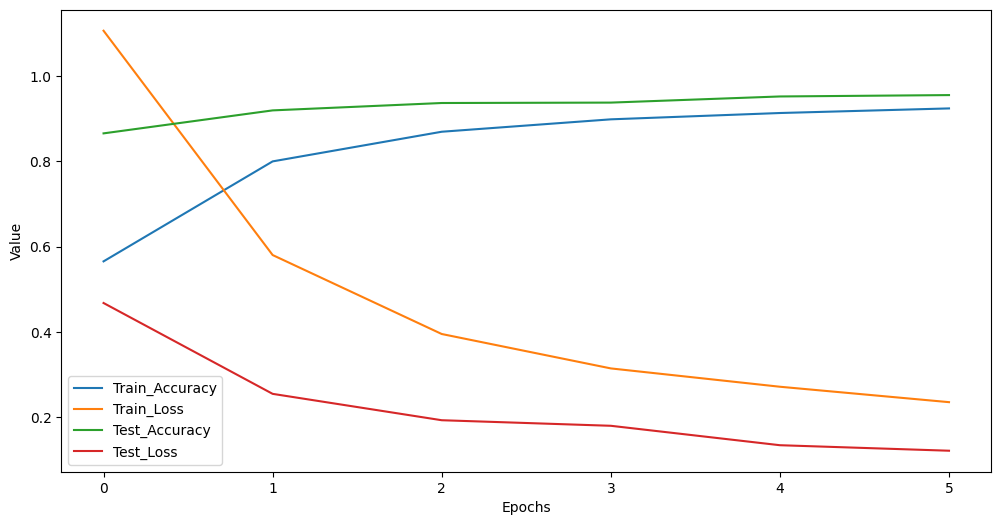

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 769ms/step


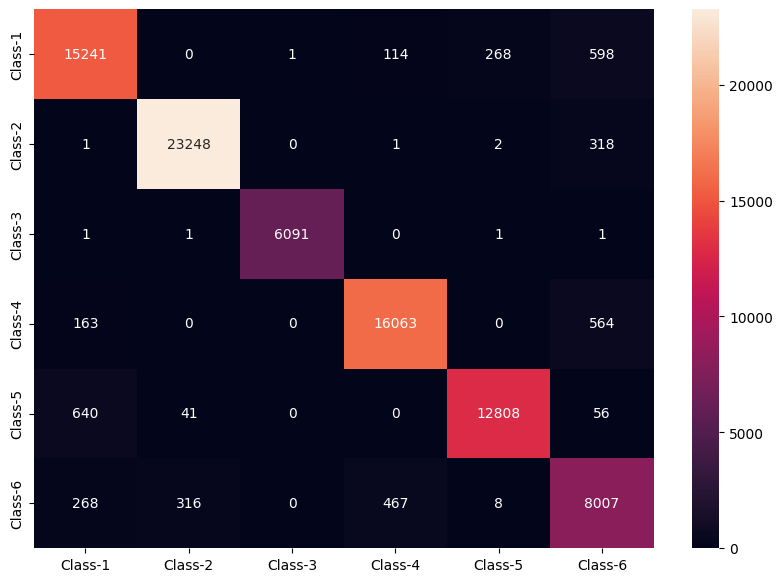

In [65]:
import pandas as pd

history = pd.DataFrame(history.history)
plt.figure(figsize = (12, 6))
plt.plot(range(len(history['accuracy'].values.tolist())), history['accuracy'].values.tolist(), label = 'Train_Accuracy')
plt.plot(range(len(history['loss'].values.tolist())), history['loss'].values.tolist(), label = 'Train_Loss')
plt.plot(range(len(history['val_accuracy'].values.tolist())), history['val_accuracy'].values.tolist(), label = 'Test_Accuracy')
plt.plot(range(len(history['val_loss'].values.tolist())), history['val_loss'].values.tolist(), label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

pred = model.predict(X_test, batch_size=1204*6, verbose=1)
plt.figure(figsize = (10,7))
classes = [f'Class-{i}' for i in range(1, 7)]
mat = confusion_matrix(np.argmax(y_test, 1),
    np.argmax(pred, 1))
df_cm = pd.DataFrame(mat, index = classes, columns = classes)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()

In [68]:
X_downsampled = X[:10000]  # Take only the first 10,000 samples
pred_t = model.predict(X_downsampled.reshape(-1, windowSize, windowSize, K, 1), batch_size=32, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [71]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, X, y, batch_size, window_size, K):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.window_size = window_size
        self.K = K

    def __len__(self):
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_X = self.X[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]
        return batch_X.reshape(-1, self.window_size, self.window_size, self.K, 1), batch_y

train_gen = DataGenerator(X, y, batch_size=32, window_size=windowSize, K=K)

# Use the generator in the predict method
pred_t = model.predict(train_gen, verbose=1)


c:\Users\Nisha Preetha M\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8884/8884 ━━━━━━━━━━━━━━━━━━━━ 79s 9ms/step


In [77]:
X_subset = X[:10000]  # Take the first 10,000 samples or select a smaller random sample
pred_t = model.predict(X_subset.reshape(-1, windowSize, windowSize, K, 1), batch_size=32, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


In [78]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, X, y, batch_size, window_size, K):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.window_size = window_size
        self.K = K

    def __len__(self):
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        batch_X = self.X[index * self.batch_size:(index + 1) * self.batch_size]
        batch_y = self.y[index * self.batch_size:(index + 1) * self.batch_size]
        return batch_X.reshape(-1, self.window_size, self.window_size, self.K, 1), batch_y

train_gen = DataGenerator(X, y, batch_size=32, window_size=windowSize, K=K)

# Use the generator to predict
pred_t = model.predict(train_gen, verbose=1)


8884/8884 ━━━━━━━━━━━━━━━━━━━━ 65s 7ms/step


In [80]:
# Assuming you already have the DataGenerator class defined

train_gen = DataGenerator(X, y, batch_size=32, window_size=windowSize, K=K)

# Use the generator with model.predict()
pred_t = model.predict(train_gen, verbose=1)


8884/8884 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step


In [81]:
print("Original shape of X:", X.shape)


Original shape of X: (284292, 15, 15, 5)


In [95]:
# Classification Report
print(classification_report(np.argmax(y_test, 1),np.argmax(pred, 1),target_names = [f'Class-{i}' for i in range(1, 7)]))
pred_t = model.predict(X.reshape(-1, windowSize, windowSize, K, 1),batch_size=1204*6, verbose=1)

              precision    recall  f1-score   support

     Class-1       0.93      0.94      0.94     16222
     Class-2       0.98      0.99      0.99     23570
     Class-3       1.00      1.00      1.00      6095
     Class-4       0.97      0.96      0.96     16790
     Class-5       0.98      0.95      0.96     13545
     Class-6       0.84      0.88      0.86      9066

    accuracy                           0.96     85288
   macro avg       0.95      0.95      0.95     85288
weighted avg       0.96      0.96      0.96     85288

40/40 ━━━━━━━━━━━━━━━━━━━━ 26s 632ms/step


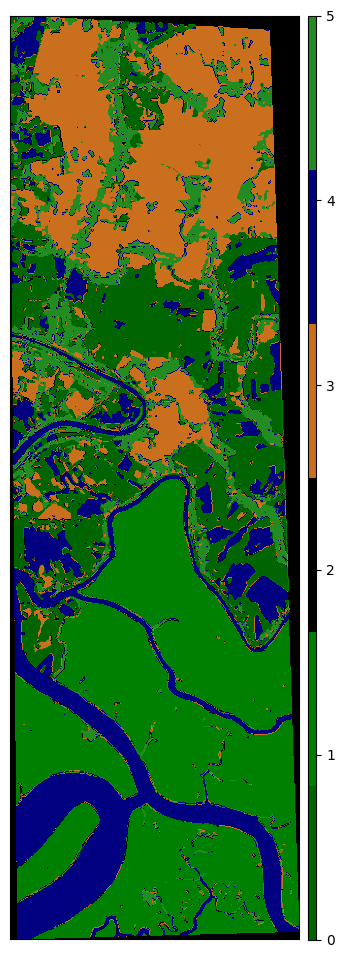

In [86]:
# Visualize Groundtruth
ep.plot_bands(np.argmax(pred_t, axis=1).reshape(954, 298), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen']))
plt.show()

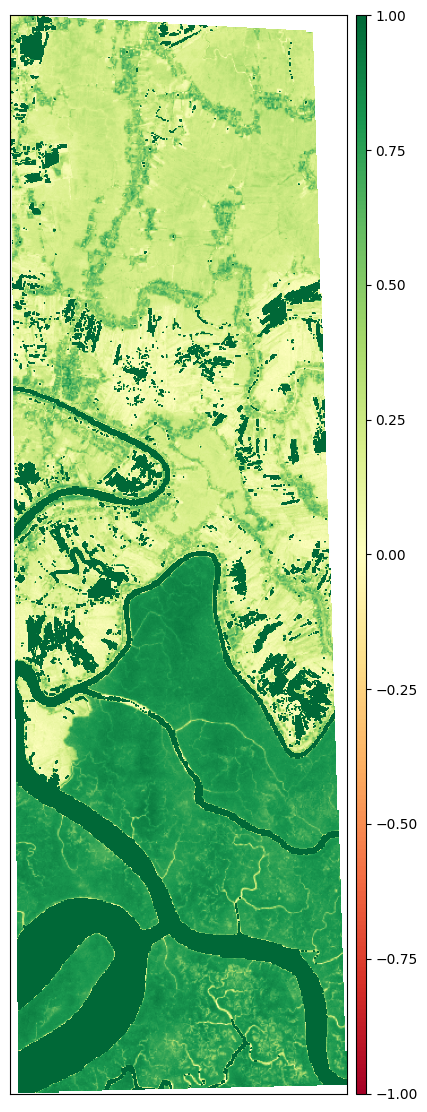

In [87]:
import earthpy.spatial as es
ndvi = es.normalized_diff(arr_st[7], arr_st[3])
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
ndvi.mean()
plt.show()

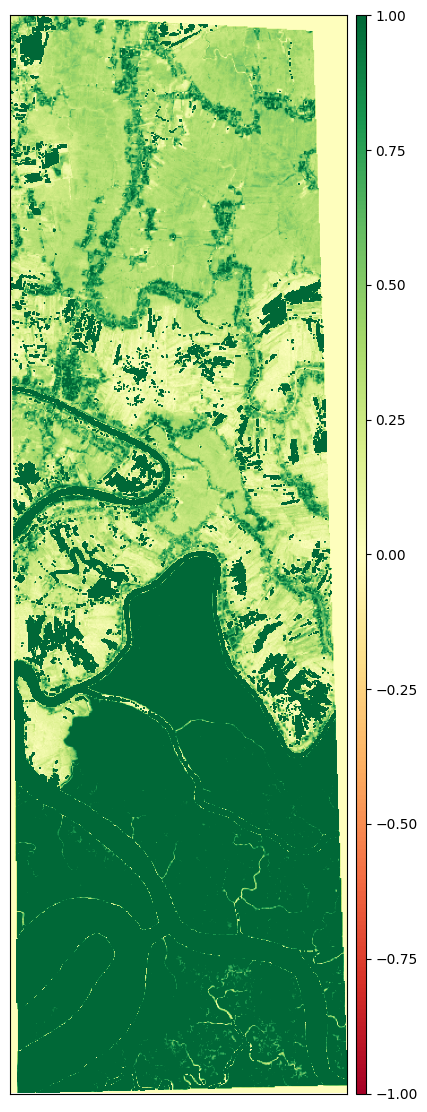

In [88]:
L = 0.5
savi = ((arr_st[7] - arr_st[3]) / (arr_st[7] + arr_st[3] + L)) * (1 + L)
ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

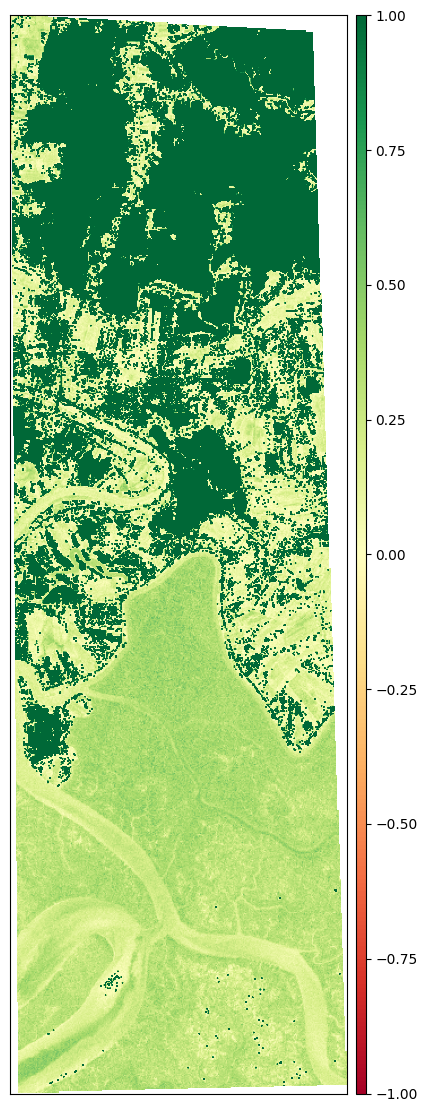

In [89]:
vari = (arr_st[2] - arr_st[3])/ (arr_st[2] + arr_st[3] - arr_st[1])
ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

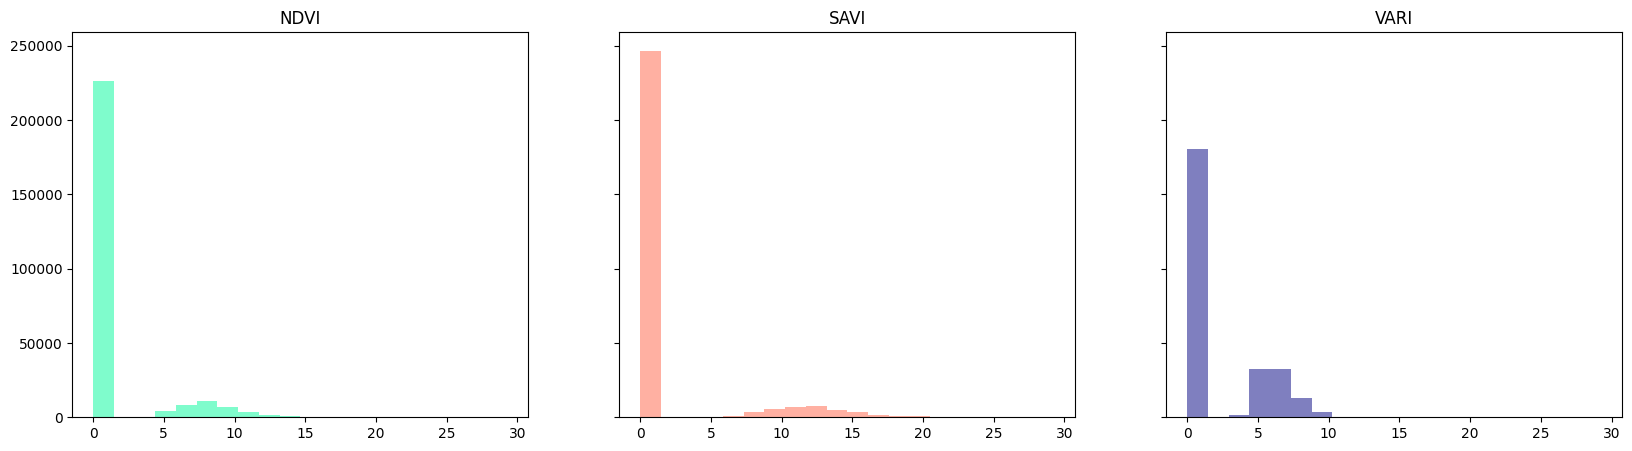

In [90]:
ep.hist(np.stack([ndvi, savi, vari]), 
alpha=0.5,
cols=3, 
figsize=(20, 5),
title = ['NDVI', 'SAVI', 'VARI'],
colors = ['mediumspringgreen', 'tomato', 'navy'])
plt.show()

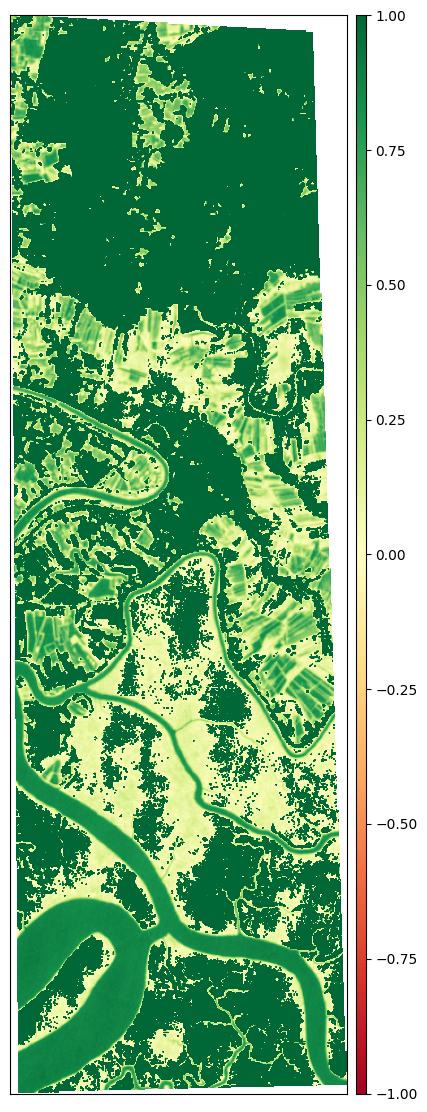

In [91]:
mndwi = es.normalized_diff(arr_st[2], arr_st[10])
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()


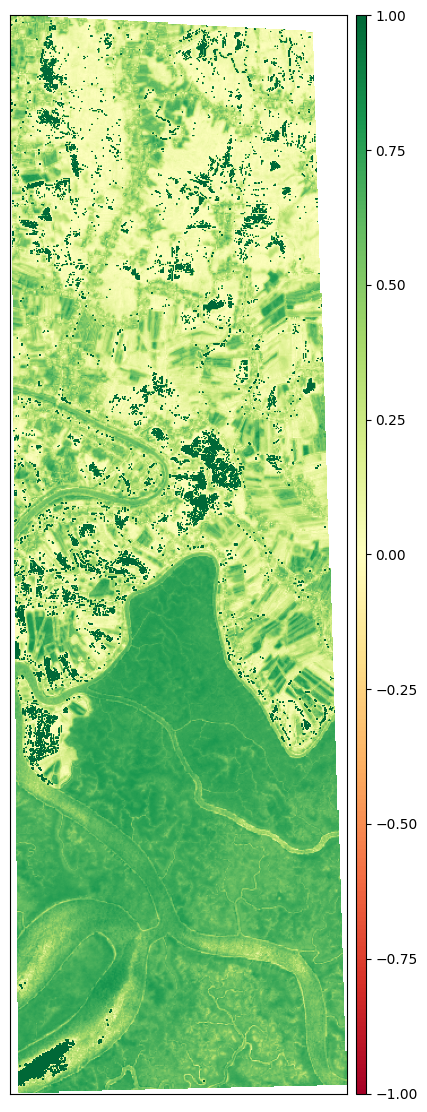

In [92]:
ndmi = es.normalized_diff(arr_st[7], arr_st[10])
ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()


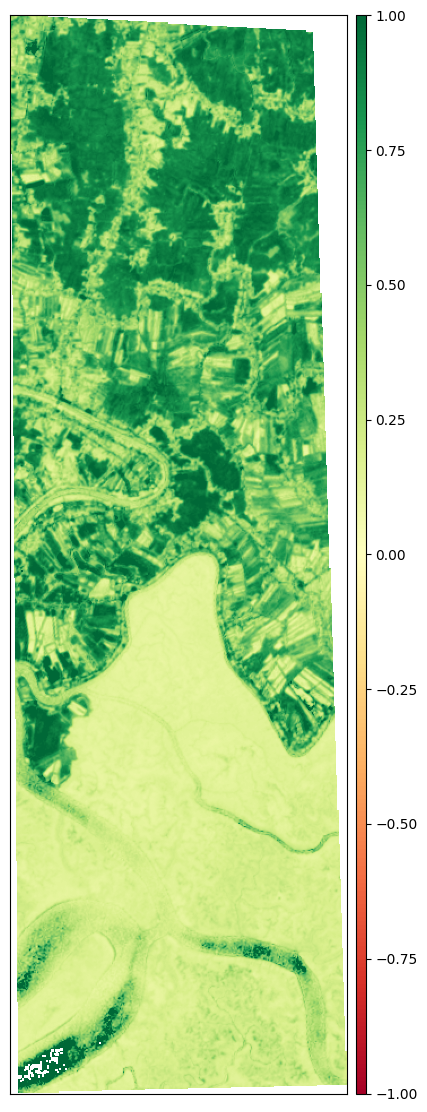

In [93]:
cmr = np.divide(arr_st[10], arr_st[11])
ep.plot_bands(cmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()

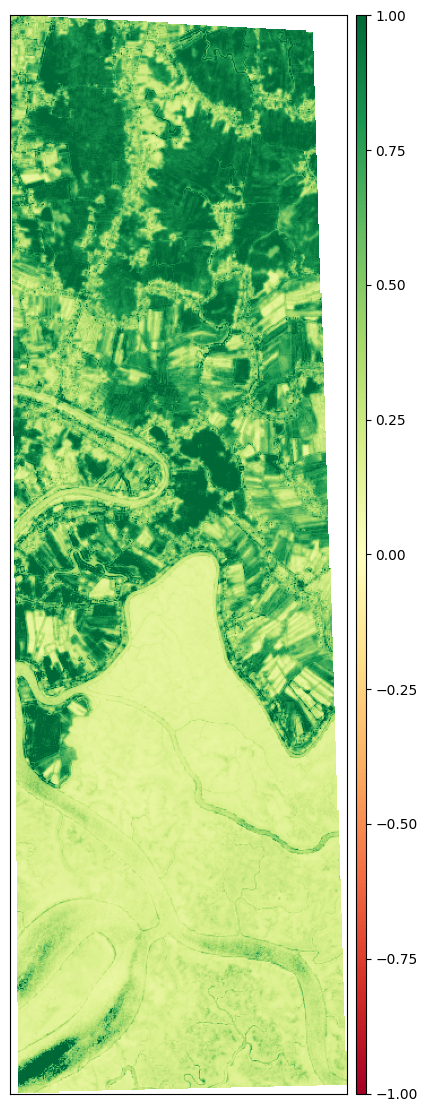

In [94]:
fmr = np.divide(arr_st[10], arr_st[7])
ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, figsize=(10, 14))
plt.show()